In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from transformers import pipeline
from scipy.stats import entropy
import torch

### Data Loading

##### Data Loading of Stock tweets data

In [ ]:
file_path0="/content/stock_tweets.csv"

In [ ]:
df0 = pd.read_csv(file_path0)
df0.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [ ]:
df0.shape

(80793, 4)

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          80793 non-null  object
 1   Tweet         80793 non-null  object
 2   Stock Name    80793 non-null  object
 3   Company Name  80793 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [ ]:
df0.describe(include="all")

,Date,Tweet,Stock Name,Company Name
count,80793,80793,80793,80793
unique,64424,64479,25,25
top,2022-04-15 14:15:26+00:00,$TSLA will triple in 2022 🚀🌕,TSLA,"Tesla, Inc."
freq,14,25,37422,37422


In [ ]:
df0.columns

Index(['Date', 'Tweet', 'Stock Name', 'Company Name'], dtype='object')

In [ ]:
# Ascending order (earliest first)
print("Five earliest dates:")
print(df0['Date'].sort_values().head(5))

# Descending order (latest first)
print("\nFive latest dates:")
print(df0['Date'].sort_values(ascending=False).head(5))

Five earliest dates:
53730    2021-09-30 00:06:02+00:00
73774    2021-09-30 00:13:26+00:00
73773    2021-09-30 00:14:49+00:00
73772    2021-09-30 00:16:45+00:00
73771    2021-09-30 00:24:50+00:00
Name: Date, dtype: object

Five latest dates:
0        2022-09-29 23:41:16+00:00
1        2022-09-29 23:24:43+00:00
2        2022-09-29 23:18:08+00:00
76295    2022-09-29 22:55:15+00:00
41511    2022-09-29 22:40:47+00:00
Name: Date, dtype: object


###### Data is from september 2021 to september 2022

##### Data Loading of Stock OHCLV data

In [ ]:
file_path="/content/stock_yfinance_data.csv"

In [ ]:
df = pd.read_csv(file_path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


In [ ]:
df.shape

(6300, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6300 non-null   object 
 1   Open        6300 non-null   float64
 2   High        6300 non-null   float64
 3   Low         6300 non-null   float64
 4   Close       6300 non-null   float64
 5   Adj Close   6300 non-null   float64
 6   Volume      6300 non-null   int64  
 7   Stock Name  6300 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 393.9+ KB


In [ ]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
count,6300,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6.300000e+03,6300
unique,252,NaN,NaN,NaN,NaN,NaN,NaN,25
top,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,TSLA
freq,25,NaN,NaN,NaN,NaN,NaN,NaN,252
mean,NaN,174.748195,177.594589,171.734715,174.657624,173.756012,2.906806e+07,NaN
std,NaN,134.989675,136.795419,133.049955,134.949601,134.582934,3.342181e+07,NaN
min,NaN,11.050000,11.210000,10.610000,11.060000,10.837500,3.078000e+05,NaN
25%,NaN,78.170002,79.891003,76.792501,78.110001,78.110001,5.857700e+06,NaN
50%,NaN,145.475128,147.475006,143.501251,145.505005,144.248146,1.518830e+07,NaN
75%,NaN,225.665001,230.662498,221.452496,225.785000,225.785000,4.122928e+07,NaN


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name'],
      dtype='object')

In [ ]:
print("Data index")
print("\nPrint ascending order dates")
print(df['Date'].sort_values().head(5))
print("\nPrint descending order dates")
print(df['Date'].sort_values(ascending=False).head(5))

Data index

Print ascending order dates
0       2021-09-30
252     2021-09-30
1008    2021-09-30
5292    2021-09-30
5796    2021-09-30
Name: Date, dtype: object

Print descending order dates
6299    2022-09-29
1007    2022-09-29
755     2022-09-29
2267    2022-09-29
5291    2022-09-29
Name: Date, dtype: object


##### Dataset is from *Sept*-2021 to Sept-2022

### EDA

###### EDA on Stock Tweets data

In [ ]:
# Convert date column into standardized form
df0['Date'] = pd.to_datetime(df0['Date'], utc=True).dt.tz_localize(None).dt.normalize()

In [ ]:
df0['Company Name'] = df0['Company Name'].str.replace(' ', '')
df0['Stock Name'] = df0['Stock Name'].astype('string').str.upper()

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          80793 non-null  datetime64[ns]
 1   Tweet         80793 non-null  object        
 2   Stock Name    80793 non-null  string        
 3   Company Name  80793 non-null  object        
dtypes: datetime64[ns](1), object(2), string(1)
memory usage: 2.5+ MB


In [ ]:
# Missing
print(df0.isnull().sum())

Date            0
Tweet           0
Stock Name      0
Company Name    0
dtype: int64


In [ ]:
# Cardinality
print("Unique dates:", df0['Date'].nunique())
print("Unique tickers:", df0['Stock Name'].nunique())
print(df0['Stock Name'].value_counts())

Unique dates: 365
Unique tickers: 25
Stock Name
TSLA    37422
TSM     11034
AAPL     5056
AMZN     4089
MSFT     4089
PG       4089
NIO      3021
META     2751
AMD      2227
NFLX     1727
GOOG     1291
PYPL      843
DIS       635
BA        399
COST      393
INTC      315
KO        310
CRM       233
XPEV      225
ENPH      216
ZS        193
VZ        123
BX         50
F          31
NOC        31
Name: count, dtype: Int64


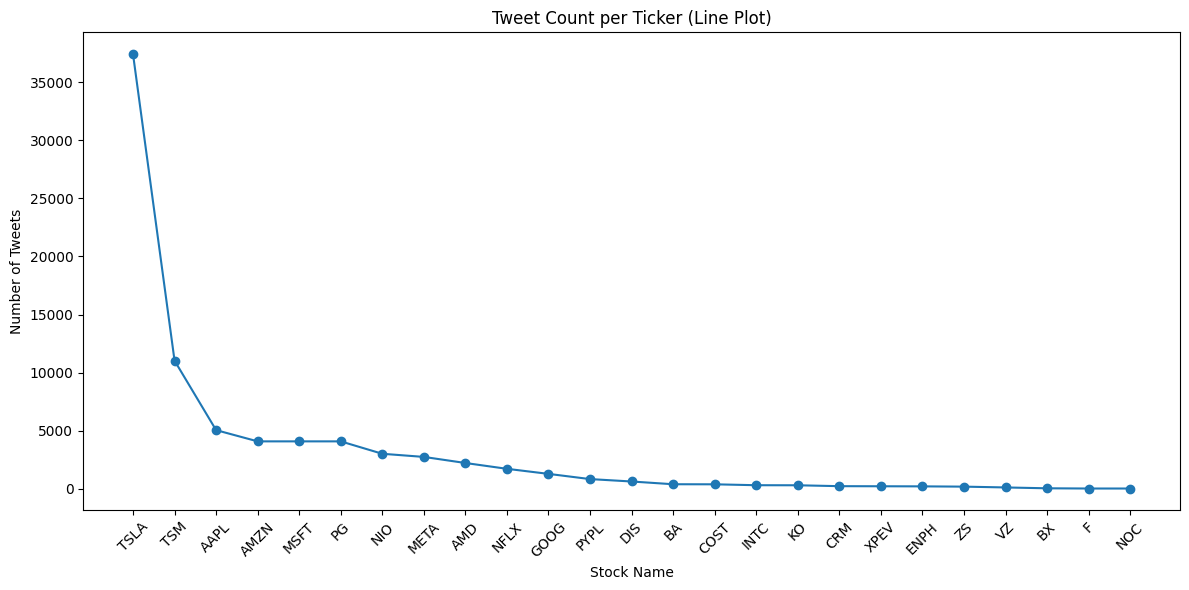

In [ ]:
# Count tweets per ticker
ticker_counts = df0['Stock Name'].value_counts()

plt.figure(figsize=(12,6))

# Line plot
plt.plot(ticker_counts.index, ticker_counts.values, marker='o')

plt.title("Tweet Count per Ticker (Line Plot)")
plt.xlabel("Stock Name")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3583938925.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


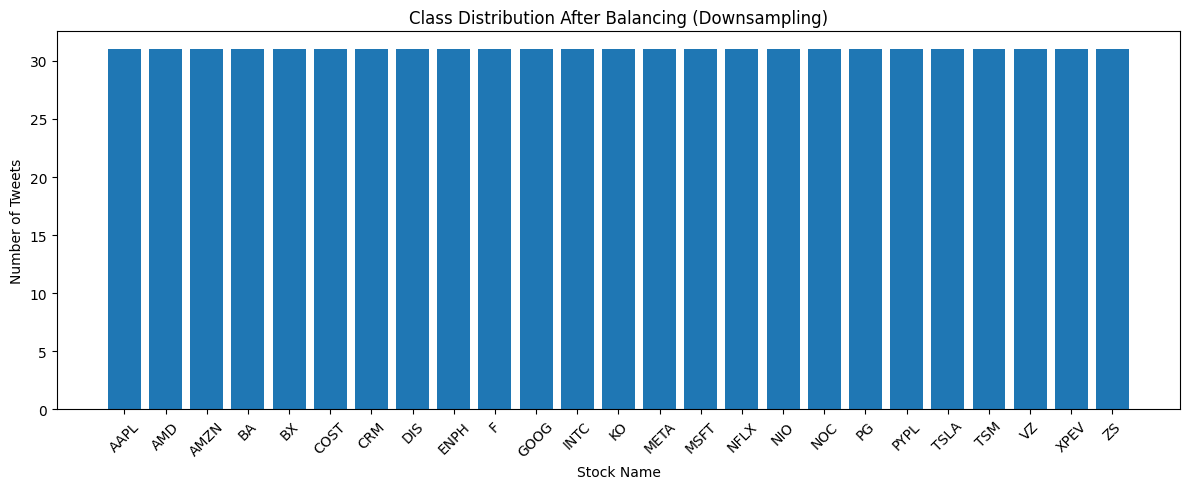

In [ ]:
# Class Imbalance
before_counts = df0['Stock Name'].value_counts()
min_count = before_counts.min()

df_balanced = (
    df0.groupby('Stock Name', group_keys=False)
       .apply(lambda x: x.sample(min_count, random_state=42))
)
balanced_counts = df_balanced['Stock Name'].value_counts()

plt.figure(figsize=(12,5))
plt.bar(balanced_counts.index, balanced_counts.values)
plt.title("Class Distribution After Balancing (Downsampling)")
plt.xlabel("Stock Name")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

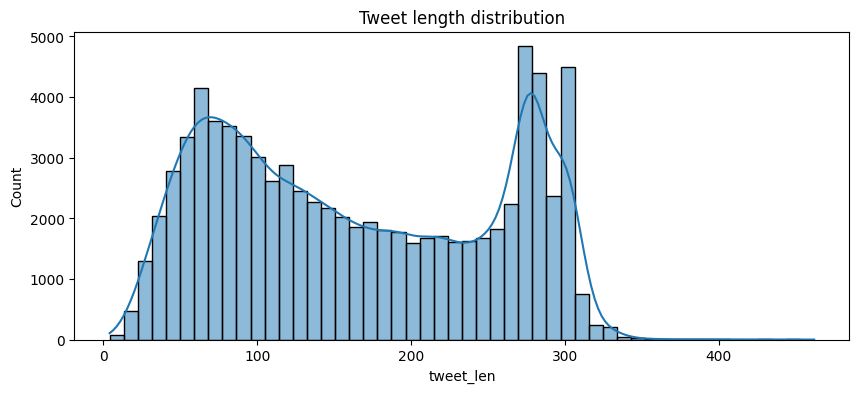

In [ ]:
df0['tweet_len'] = df0['Tweet'].str.len()

plt.figure(figsize=(10,4))
sns.histplot(df0['tweet_len'], bins=50, kde=True)
plt.title("Tweet length distribution")
plt.show()

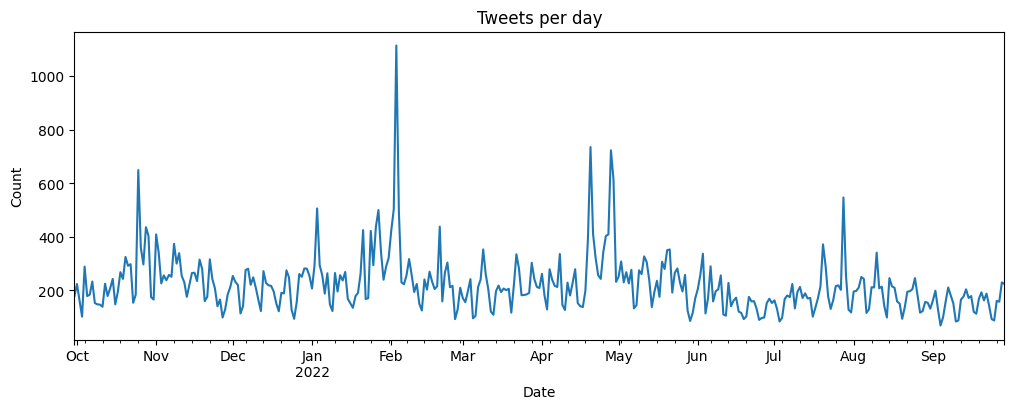

In [ ]:
tweets_per_day = df0.groupby('Date').size()

plt.figure(figsize=(12,4))
tweets_per_day.plot()
plt.title("Tweets per day")
plt.ylabel("Count")
plt.show()

##### EDA on Stock OHCLV data

In [ ]:
# Convert date column into standardized form
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_localize(None).dt.normalize()

In [ ]:
#Convert Variables into standard format
df['Stock Name'] = df['Stock Name'].astype('string').str.upper()

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Stock Name,0


In [ ]:
df['has_space'] = df['Stock Name'].str.contains(' ')
print(df[df['has_space'] == 'True'])

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Stock Name, has_space]
Index: []


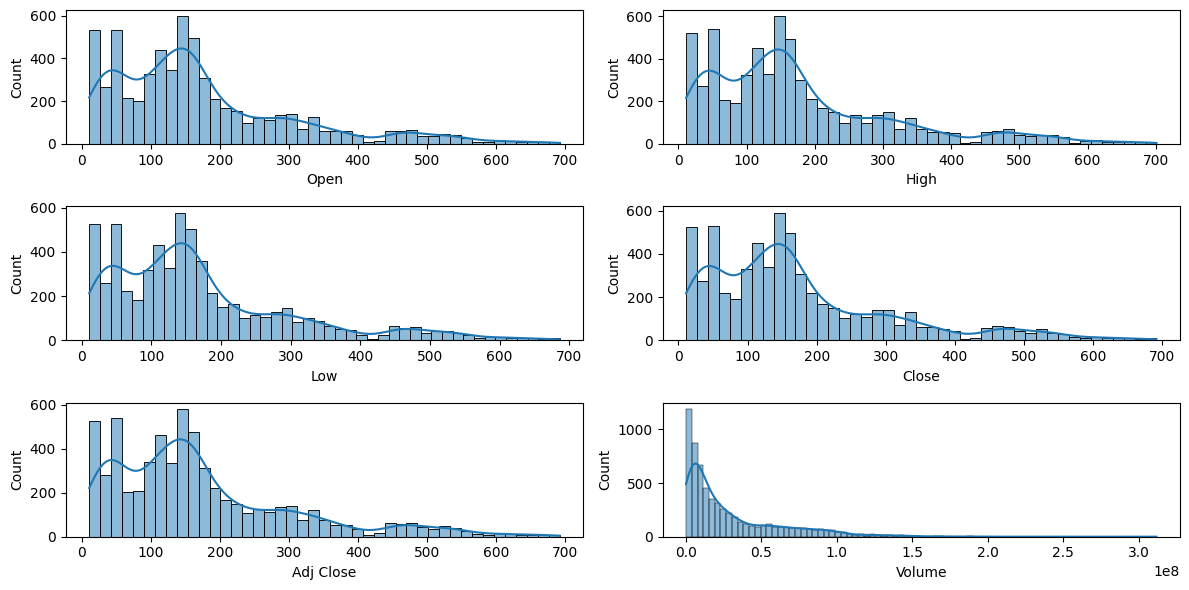

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(3,2,1)
sns.histplot(df['Open'],kde=True)
plt.xlabel('Open')
plt.subplot(3,2,2)
sns.histplot(df['High'],kde=True)
plt.xlabel('High')
plt.subplot(3,2,3)
sns.histplot(df['Low'],kde=True)
plt.xlabel('Low')
plt.subplot(3,2,4)
sns.histplot(df['Close'],kde=True)
plt.xlabel('Close')
plt.subplot(3,2,5)
sns.histplot(df['Adj Close'],kde=True)
plt.xlabel('Adj Close')
plt.subplot(3,2,6)
sns.histplot(df['Volume'],kde=True)
plt.xlabel('Volume')
plt.tight_layout()
plt.show()

In [ ]:
df_outliers = df.copy()
numerical_columns = df_outliers.select_dtypes(include=['int64','float64'])
for col in numerical_columns:
  Q1 = df_outliers[col].quantile(0.25)
  Q3 = df_outliers[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR
  df_outliers = df_outliers[(df_outliers[col] > lower_bound) & (df_outliers[col] <= upper_bound)]
print(f"Number of outliers removed:{len(df) - len(df_outliers)}")

Number of outliers removed:821


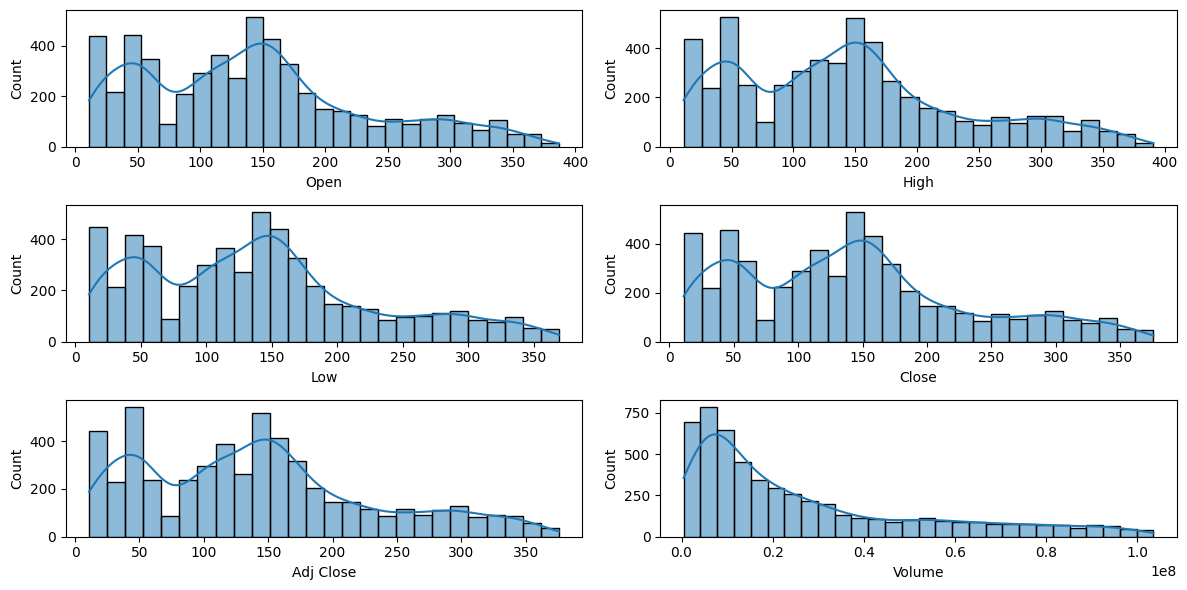

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(3,2,1)
sns.histplot(df_outliers['Open'],kde=True)
plt.xlabel('Open')
plt.subplot(3,2,2)
sns.histplot(df_outliers['High'],kde=True)
plt.xlabel('High')
plt.subplot(3,2,3)
sns.histplot(df_outliers['Low'],kde=True)
plt.xlabel('Low')
plt.subplot(3,2,4)
sns.histplot(df_outliers['Close'],kde=True)
plt.xlabel('Close')
plt.subplot(3,2,5)
sns.histplot(df_outliers['Adj Close'],kde=True)
plt.xlabel('Adj Close')
plt.subplot(3,2,6)
sns.histplot(df_outliers['Volume'],kde=True)
plt.xlabel('Volume')
plt.tight_layout()
plt.show()

In [ ]:
counts = df_outliers['Stock Name'].value_counts().sort_index()

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

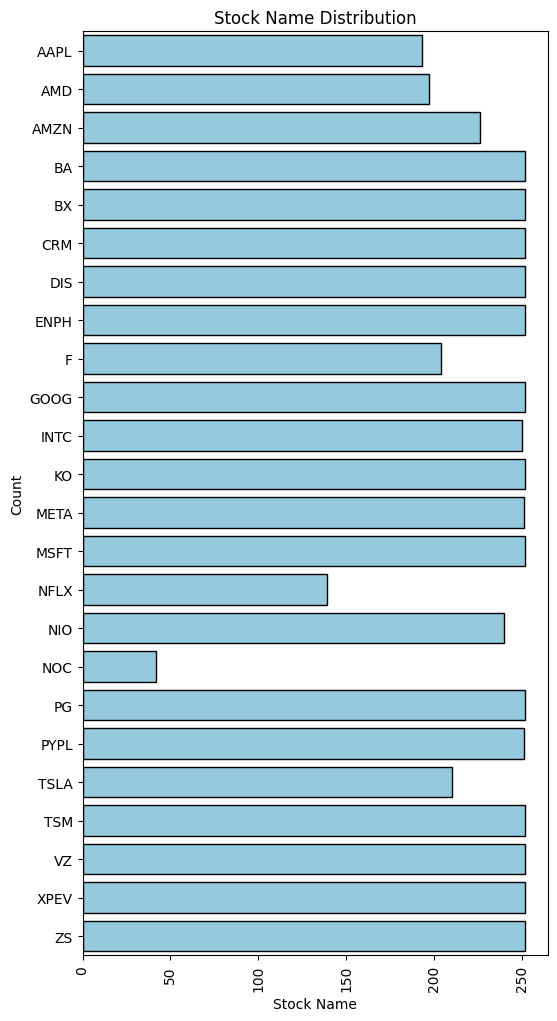

In [ ]:
plt.figure(figsize=(6,12))
sns.barplot(y=counts.index, x=counts.values,color='skyblue',edgecolor='black')
plt.xlabel('Stock Name')
plt.ylabel('Count')
plt.title('Stock Name Distribution')
plt.xticks(rotation=90)

Correlation matrix


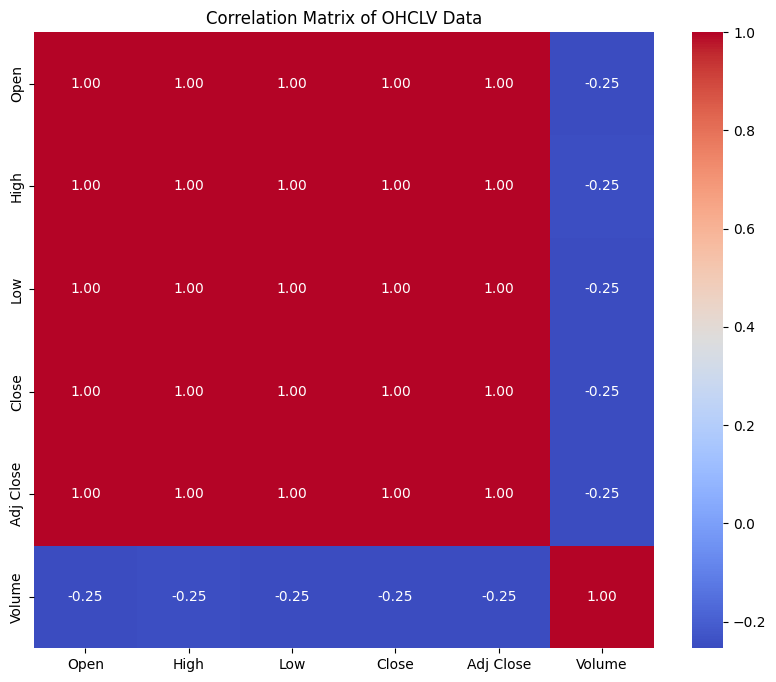

In [ ]:
corr_matrix = numerical_columns.corr()
print("Correlation matrix")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of OHCLV Data')
plt.show()

#### We see that the columns are highy corelated but we are not going to remove the multicolinearity issue as we expect columns to be highly colinear for stock prediction

In [ ]:
inertia_scores = []
silhouette_scores = []
n_clusters = range(2,11)

for n_cluster in n_clusters:
  kmeans = KMeans(n_clusters= n_cluster,random_state=42)
  kmeans.fit(df[['Adj Close']])
  inertia_scores.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(df[['Adj Close']],kmeans.labels_))
print(f"Inertia Scores:{inertia_scores}")
print(f"Silhouette Scores:{silhouette_scores}")

Inertia Scores:[35269587.77862155, 18974911.571581956, 8409994.761393465, 5772708.15995824, 4306347.866073144, 2976925.4596082256, 2676562.408990912, 1862245.2511338792, 1559700.8213847876]
Silhouette Scores:[np.float64(0.6685387197575683), np.float64(0.5843124032174553), np.float64(0.6100371354331805), np.float64(0.5906825774144624), np.float64(0.5902783580180824), np.float64(0.5915011993484058), np.float64(0.5300081751768287), np.float64(0.5861412949415741), np.float64(0.5765538670307642)]


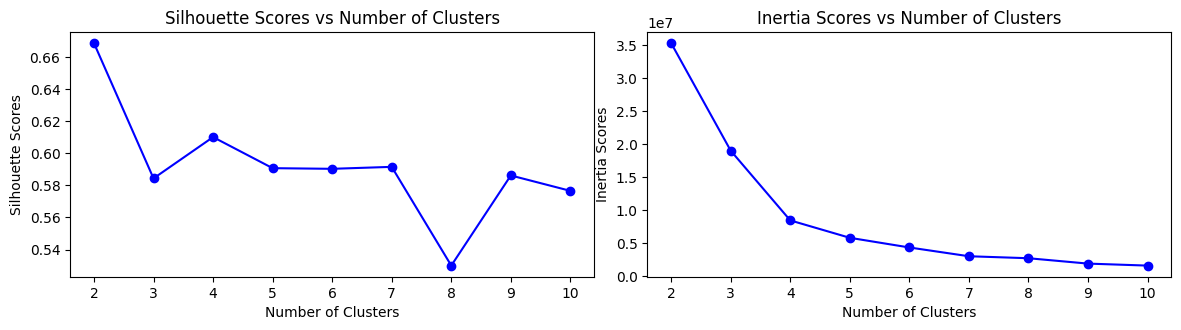

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.plot(n_clusters,silhouette_scores,marker='o',color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores vs Number of Clusters')

plt.subplot(2,2,2)
plt.plot(n_clusters,inertia_scores,marker='o',color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Scores')
plt.title('Inertia Scores vs Number of Clusters')

plt.tight_layout()
plt.show()

In [ ]:
# Need to think how we ca implement clustering


In [ ]:
# Load the dataset
import warnings
warnings.filterwarnings('ignore')
import time
import os
from tqdm import tqdm
import gc

print("=" * 70)
print("EMOTION CLASSIFICATION - DEVICE DETECTION")
print("=" * 70)

# Detect device
device = 0 if torch.cuda.is_available() else -1

if device == 0:
    gpu_name = torch.cuda.get_device_name(0)
    gpu_memory = torch.cuda.get_device_properties(0).total_memory / 1e9
    print(f"GPU DETECTED: {gpu_name}")
    print(f"  Memory: {gpu_memory:.2f} GB")
    device_type = f"GPU: {gpu_name}"
    # Enable GPU memory optimization
    torch.cuda.empty_cache()
else:
    print("GPU not available, using CPU")
    device_type = "CPU"

print(f"Processing device: {device_type}")
print("=" * 70)

print("\nLoading emotion classification models...")
print("-" * 70)

# Load Emtract model (DistilBERT - faster)
print("Loading Emtract (DistilBERT) model...")
emtract_classifier = pipeline(
    'text-classification',
    model='vamossyd/emtract-distilbert-base-uncased-emotion',
    top_k=None,
    device=device,
    model_kwargs={'torch_dtype': torch.float16} if device == 0 else {}
)
print(f"Emtract model loaded on {device_type}")

# Load Hartmann model (RoBERTa - more detailed)
print("Loading Hartmann (RoBERTa-large) model...")
hartmann_classifier = pipeline(
    'text-classification',
    model='j-hartmann/emotion-english-roberta-large',
    top_k=None,
    device=device,
    model_kwargs={'torch_dtype': torch.float16} if device == 0 else {}
)
print(f"Hartmann model loaded on {device_type}")
print("-" * 70)

def get_all_scores(tweet, classifier, model_name):
    if pd.isna(tweet) or not isinstance(tweet, str):
        return {f'{model_name}_Emotion': 'UNKNOWN'}

    try:
        results = classifier(tweet)
        if isinstance(results, list):
            results = results[0]
    except Exception as e:
        print(f"Error classifying tweet: {e}")
        return {f'{model_name}_Emotion': 'ERROR'}

    output = {}
    output[f'{model_name}_Emotion'] = results[0]['label']

    for item in results:
        output[f'{model_name}_{item["label"]}_Score'] = item['score']

    return output

def batch_classify(tweets, classifier, model_name, batch_size=96):
    results_list = []
    tweets_list = tweets.tolist()

    # Filter out NaN and non-string values
    valid_tweets = []
    valid_indices = []
    for idx, tweet in enumerate(tweets_list):
        if pd.notna(tweet) and isinstance(tweet, str):
            valid_tweets.append(tweet)
            valid_indices.append(idx)

    truncation_warnings = 0

    # Process in batches with optimizations
    for i in tqdm(range(0, len(valid_tweets), batch_size), desc=f"Processing {model_name}"):
        batch = valid_tweets[i:i+batch_size]
        try:
            # Use no_grad context for inference to save memory
            with torch.no_grad():
                # Process FULL tweets without truncation for better accuracy
                batch_results = classifier(batch, top_k=None)

            for result_idx, results in enumerate(batch_results):
                if not isinstance(results, list):
                    results = [results]

                output = {}
                output[f'{model_name}_Emotion'] = results[0]['label']

                for item in results:
                    output[f'{model_name}_{item["label"]}_Score'] = item['score']

                results_list.append((valid_indices[i + result_idx], output))
        except RuntimeError as e:
            # Handle token length errors gracefully
            if "token" in str(e).lower() or "length" in str(e).lower():
                truncation_warnings += len(batch)
                # Fallback: process with truncation for very long tweets
                for tweet_idx, tweet_text in enumerate(batch):
                    try:
                        with torch.no_grad():
                            result = classifier(tweet_text, truncation=True, top_k=None)
                            if isinstance(result, list):
                                result = result[0]
                        results_list.append((valid_indices[i + tweet_idx], {
                            f'{model_name}_Emotion': result[0]['label'],
                            **{f'{model_name}_{item["label"]}_Score': item['score'] for item in result}
                        }))
                    except Exception as e2:
                        results_list.append((valid_indices[i + tweet_idx], {f'{model_name}_Emotion': 'ERROR'}))
            else:
                print(f"Error processing batch: {e}")
                for result_idx in range(len(batch)):
                    results_list.append((valid_indices[i + result_idx], {f'{model_name}_Emotion': 'ERROR'}))
        except Exception as e:
            print(f"Error processing batch: {e}")
            for result_idx in range(len(batch)):
                results_list.append((valid_indices[i + result_idx], {f'{model_name}_Emotion': 'ERROR'}))

        # Periodic GPU cache cleanup (only clear GPU, not system memory with gc.collect)
        if device == 0 and (i // batch_size) % 10 == 0:
            torch.cuda.empty_cache()

    if truncation_warnings > 0:
        print(f"{truncation_warnings} tweets exceeded max token length (fallback to truncation applied)")

    # Create DataFrame with proper indexing
    results_df = pd.DataFrame([output for _, output in results_list])
    results_df.index = [idx for idx, _ in results_list]
    return results_df.reindex(range(len(tweets_list))).fillna({f'{model_name}_Emotion': 'UNKNOWN'})

# Apply classifications
print(f"\nApplying emotion classification ({device_type})...")
print("-" * 70)
print(f"Processing FULL tweets WITHOUT truncation for maximum accuracy")
print("-" * 70)

print(f"[1/2] Classifying with Emtract model (batch_size=96, full tweet processing)...")
start_time = time.time()
df0_all_emotions = df0.copy()
emtract_results = batch_classify(df0_all_emotions['Tweet'], emtract_classifier, 'Emtract', batch_size=96)
df0_all_emotions = pd.concat([df0_all_emotions, emtract_results], axis=1)
emtract_time = time.time() - start_time
print(f"Emtract completed in {emtract_time:.2f} seconds ({len(df0_all_emotions)} tweets)")
print(f"Emtract results saved in DataFrame (columns: {len(emtract_results.columns)})")

# Delete intermediate variable to free memory, but data is safe in df0
del emtract_results
if device == 0:
    torch.cuda.empty_cache()

print(f"[2/2] Classifying with Hartmann model (batch_size=96, full tweet processing)...")
start_time = time.time()
hartmann_results = batch_classify(df0_all_emotions['Tweet'], hartmann_classifier, 'Hartmann', batch_size=96)
df0_all_emotions = pd.concat([df0_all_emotions, hartmann_results], axis=1)
hartmann_time = time.time() - start_time
print(f"Hartmann completed in {hartmann_time:.2f} seconds ({len(df0_all_emotions)} tweets)")
print(f"Hartmann results saved in DataFrame (columns: {len(hartmann_results.columns)})")

# Delete intermediate variable to free memory, but data is safe in df0
del hartmann_results

# Save results IMMEDIATELY after processing (data is now in df0_all_emotions)
print("\nSaving combined results to file...")
df0_all_emotions.to_parquet('stock_tweets_with_all_scores.parquet', index=False)
print(f"✓ Results saved: {df0_all_emotions.shape[0]} rows × {df0_all_emotions.shape[1]} columns")

print("-" * 70)
print("\n CLASSIFICATION COMPLETE")
print(f"  Device used: {device_type}")
print(f"  Total processing time: {emtract_time + hartmann_time:.2f} seconds")
print(f"  Tweets processed: {len(df0_all_emotions)}")
print(f"  Avg time per tweet: {((emtract_time + hartmann_time) / len(df0_all_emotions)):.4f}s")
print(f"  Processing mode: FULL tweets ")
print(f"  Output file: stock_tweets_with_all_scores.parquet")
print("=" * 70)

# Final GPU cleanup (AFTER saving)
if device == 0:
    torch.cuda.empty_cache()
gc.collect()

EMOTION CLASSIFICATION - DEVICE DETECTION
GPU not available, using CPU
Processing device: CPU

Loading emotion classification models...
----------------------------------------------------------------------
Loading Emtract (DistilBERT) model...


config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/283M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Emtract model loaded on CPU
Loading Hartmann (RoBERTa-large) model...


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/328 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


Hartmann model loaded on CPU
----------------------------------------------------------------------

Applying emotion classification (CPU)...
----------------------------------------------------------------------
Processing FULL tweets WITHOUT truncation for maximum accuracy
----------------------------------------------------------------------
[1/2] Classifying with Emtract model (batch_size=96, full tweet processing)...



Processing Emtract:   0%|          | 0/842 [00:00<?, ?it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (67 > 64). Running this sequence through the model will result in indexing errors

Processing Emtract:   1%|          | 7/842 [01:49<3:38:08, 15.67s/it]


KeyboardInterrupt: 

###### Load the sentiments in the stock tweets data

###### We have loaded the dataset with both hartmann and emtract model scores and compare the values with the help of two metrics: Shanon Entropy and Valence Bias which falls under fidelity test to validate the performance of our emtract model.

In [ ]:
df2 = pd.read_parquet('/content/stock_tweets_with_all_scores.parquet')
def compute_entropy(df, prefix):
    prob_cols = [c for c in df.columns if c.startswith(prefix) and c.endswith('_Score')]
    prob_cols = sorted(prob_cols)
    probs = df[prob_cols].values
    return np.apply_along_axis(lambda x: entropy(x, base=2), 1, probs), prob_cols

# Emtract entropy
df2['Emtract_Entropy'], emtract_cols = compute_entropy(df2, 'Emtract_')

# Hartmann entropy
df2['Hartmann_Entropy'], hartmann_cols = compute_entropy(df2, 'Hartmann_')

# Final Comparison in entropy of the models
avg_emtract_h = df2['Emtract_Entropy'].mean()
avg_hartmann_h = df2['Hartmann_Entropy'].mean()
print(f"Average entropy of emtract model:{avg_emtract_h:.2f}")
print(f"Average entropy of hartmann model:{avg_hartmann_h:.2f}")

Average entropy of emtract model:1.36
Average entropy of hartmann model:1.60


##### We can observe that the entropy of hartmann model is greater than entropy model which concludes that the hartmann model is less infrmative.

In [ ]:
strong_signal_threshold = 0.5
EMOTION_ALIASES = {
    "Happy": ["happy", "happiness", "joy"],
    "Sad": ["sad", "sadness", "unhappy"],
    "Anger": ["anger", "angry", "rage"],
    "Fear": ["fear", "afraid", "anxiety"],
    "Disgust": ["disgust", "disgusted"]
}
def find_emotion_columns(df2, prefix, emotions):
    cols = []
    for col in df2.columns:
        if not col.startswith(prefix):
            continue
        if not col.endswith("_Score"):
            continue

        col_l = col.lower()
        for emo in emotions:
            for alias in EMOTION_ALIASES[emo]:
                if alias in col_l:
                    cols.append(col)
                    break
    return list(set(cols))


def compute_valence(df2, prefix):
    # Positive emotions
    pos_cols = find_emotion_columns(df2, prefix, ["Happy"])

    # Negative emotions
    neg_cols = find_emotion_columns(
        df2, prefix, ["Sad", "Anger", "Fear", "Disgust"]
    )

    if len(pos_cols) == 0 or len(neg_cols) == 0:
        raise ValueError(f"Emotion columns missing for {prefix}")

    pos_score = df2[pos_cols].sum(axis=1)
    neg_score = df2[neg_cols].sum(axis=1)

    return pos_score - neg_score, pos_cols, neg_cols
print("Calculating Valence Scores")

df2['Emtract_Valence'], em_pos, em_neg = compute_valence(df2, "Emtract")
df2['Hartmann_Valence'], ha_pos, ha_neg = compute_valence(df2, "Hartmann")
# Signal intensity (mean absolute valence)
emtract_intensity = df2['Emtract_Valence'].abs().mean()
hartmann_intensity = df2['Hartmann_Valence'].abs().mean()
# Actionable rate
emtract_actionable = (
    df2['Emtract_Valence'].abs() > strong_signal_threshold
).mean() * 100

hartmann_actionable = (
    df2['Hartmann_Valence'].abs() > strong_signal_threshold
).mean() * 100
# Contradiction rate
contradictions = df2[
    ((df2['Emtract_Valence'] > 0.1) & (df2['Hartmann_Valence'] < -0.1)) |
    ((df2['Emtract_Valence'] < -0.1) & (df2['Hartmann_Valence'] > 0.1))
]
contradiction_rate = (len(contradictions) / len(df2)) * 100

# Print results
print("\n MODEL UTILITY COMPARISON")

print("\n SIGNAL INTENSITY (Avg Absolute Valence Score: 0–1)")
print("(Higher = More decisive emotions)")
print(f"Emtract:  {emtract_intensity:.4f}")
print(f"Hartmann: {hartmann_intensity:.4f}")

print(f"\n ACTIONABLE RATE (|Valence| > {strong_signal_threshold})")
print("(Higher = More potential trading triggers)")
print(f"Emtract:  {emtract_actionable:.2f}%")
print(f"Hartmann: {hartmann_actionable:.2f}%")

print("\n CONTRADICTION RATE")
print("(How often do they completely disagree?)")
print(f"{contradiction_rate:.2f}% of tweets have opposite sentiments.")

Calculating Valence Scores

 MODEL UTILITY COMPARISON

 SIGNAL INTENSITY (Avg Absolute Valence Score: 0–1)
(Higher = More decisive emotions)
Emtract:  0.3783
Hartmann: 0.5701

 ACTIONABLE RATE (|Valence| > 0.5)
(Higher = More potential trading triggers)
Emtract:  36.23%
Hartmann: 58.74%

 CONTRADICTION RATE
(How often do they completely disagree?)
23.57% of tweets have opposite sentiments.


In [ ]:
# Calculating the average valence of the model
avg_emtract_valence = df2['Emtract_Valence'].mean()
avg_hartmann_valence = df2['Hartmann_Valence'].mean()

print(f"Average Emtract Valence (Bias): {avg_emtract_valence:.4f}")
print(f"Average Hartmann Valence (Bias): {avg_hartmann_valence:.4f}")

Average Emtract Valence (Bias): 0.0778
Average Hartmann Valence (Bias): -0.4422


###### We can observe that the hartmann model is more negatively biased than our emtract model, concluding the fact that emtract model is more suited for stock prediction.

In [ ]:
df0_model = df0.copy()

# Loading the emtract model for consumption in data pipeline
print("=" * 70)
print("EMOTION CLASSIFICATION - SIMPLIFIED PIPELINE")
print("=" * 70)

device = 0 if torch.cuda.is_available() else -1

if device == 0:
    gpu_name = torch.cuda.get_device_name(0)
    print(f" GPU DETECTED: {gpu_name}")
    torch.cuda.empty_cache()
else:
    print(" Using CPU")

emotion_classifier = pipeline('text-classification',
                             model='vamossyd/emtract-distilbert-base-uncased-emotion',
                             device=device,
                             model_kwargs={'torch_dtype': torch.float16} if device == 0 else {})

def batch_classify_emotions(tweets, classifier, batch_size=128):
    emotions = []
    tweets_list = tweets.tolist()

    # Filter valid tweets
    valid_tweets = []
    valid_indices = []
    for idx, tweet in enumerate(tweets_list):
        if pd.notna(tweet) and isinstance(tweet, str):
            valid_tweets.append(tweet)
            valid_indices.append(idx)

    # Initialize results array with default values
    results = ['UNKNOWN'] * len(tweets_list)

    # Process in batches
    print(f"\nProcessing {len(valid_tweets)} tweets in batches of {batch_size}...")
    for i in tqdm(range(0, len(valid_tweets), batch_size), desc="Classifying emotions"):
        batch = valid_tweets[i:i+batch_size]
        try:
            with torch.no_grad():
                batch_results = classifier(batch, top_k=None)

            for result_idx, result in enumerate(batch_results):
                # Extract top emotion label
                if isinstance(result, list) and len(result) > 0:
                    top_emotion = result[0]['label']
                elif isinstance(result, dict) and 'label' in result:
                    top_emotion = result['label']
                else:
                    top_emotion = 'ERROR'

                results[valid_indices[i + result_idx]] = top_emotion
        except Exception as e:
            print(f"⚠ Error in batch {i}: {str(e)}")
            for result_idx in range(len(batch)):
                results[valid_indices[i + result_idx]] = 'ERROR'

        # GPU memory cleanup
        if device == 0 and (i // batch_size) % 10 == 0:
            torch.cuda.empty_cache()

    return results

# Apply emotion classification to dataset tweets
print(f"\nDataset shape: {df0_model.shape}")
print(f"Tweet column: 'Tweet'")

start_time = time.time()
df0_model['emotion'] = batch_classify_emotions(df0_model['Tweet'], emotion_classifier, batch_size=128)
classification_time = time.time() - start_time

# Calculate statistics
emotion_counts = df0_model['emotion'].value_counts()
print("\n" + "=" * 70)
print("CLASSIFICATION SUMMARY")
print("=" * 70)
print(f"\n Classification completed in {classification_time:.2f} seconds")
print(f"  Processing speed: {len(df0_model)/classification_time:.2f} tweets/second")
print(f"\nEmotion Distribution:")
print(emotion_counts)

# Save the new dataset with emotions
df0_model.to_parquet('stock_tweets_with_emotions.parquet', index=False)
print(f"\n Dataset saved: stock_tweets_with_emotions.parquet")
print(f"  Rows: {len(df0_model)}, Columns: {len(df0_model.columns)}")
print("=" * 70)

# Final GPU cleanup
if device == 0:
    torch.cuda.empty_cache()
gc.collect()

EMOTION CLASSIFICATION - SIMPLIFIED PIPELINE
✓ GPU DETECTED: Tesla T4


Device set to use cuda:0



Dataset shape: (80793, 5)
Tweet column: 'Tweet'

Processing 80793 tweets in batches of 128...


Classifying emotions: 100%|██████████| 632/632 [06:24<00:00,  1.64it/s]



CLASSIFICATION SUMMARY

 Classification completed in 384.91 seconds
  Processing speed: 209.90 tweets/second

Emotion Distribution:
emotion
Neutral     34628
Happy       26830
Fear         7488
Surprise     4838
Disgust      4151
Sad          1722
Anger        1136
Name: count, dtype: int64

 Dataset saved: stock_tweets_with_emotions.parquet
  Rows: 80793, Columns: 6


0

In [ ]:
# Loading the dataset with emotions loaded by emtract model
df0_final = pd.read_parquet("/content/stock_tweets_with_emotions.parquet")

In [ ]:
# Print the new columns
df0_final.columns

Index(['Date', 'Tweet', 'Stock Name', 'Company Name', 'tweet_len', 'emotion'], dtype='object')

In [ ]:
# Print the structure of new dataset
df0_final.describe(include="all")

,Date,Tweet,Stock Name,Company Name,tweet_len,emotion
count,80793,80793,80793,80793,80793.000000,80793
unique,NaN,64479,25,25,NaN,7
top,NaN,$TSLA will triple in 2022 🚀🌕,TSLA,"Tesla,Inc.",NaN,Neutral
freq,NaN,25,37422,37422,NaN,34628
mean,2022-03-19 01:54:16.990085888,NaN,NaN,NaN,165.164259,NaN
min,2021-09-30 00:00:00,NaN,NaN,NaN,4.000000,NaN
25%,2021-12-27 00:00:00,NaN,NaN,NaN,84.000000,NaN
50%,2022-03-16 00:00:00,NaN,NaN,NaN,152.000000,NaN
75%,2022-06-04 00:00:00,NaN,NaN,NaN,258.000000,NaN
max,2022-09-29 00:00:00,NaN,NaN,NaN,462.000000,NaN


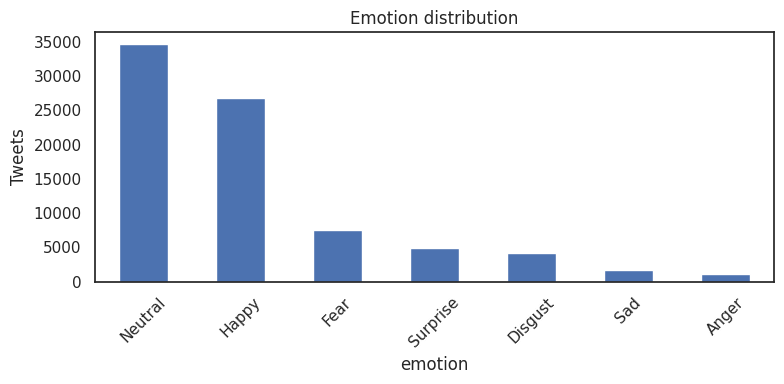

In [ ]:
# Emotion distribution
sns.set(style="white")
plt.figure(figsize=(8,4))
df0_final['emotion'].value_counts().plot(kind='bar')
plt.title("Emotion distribution")
plt.ylabel("Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

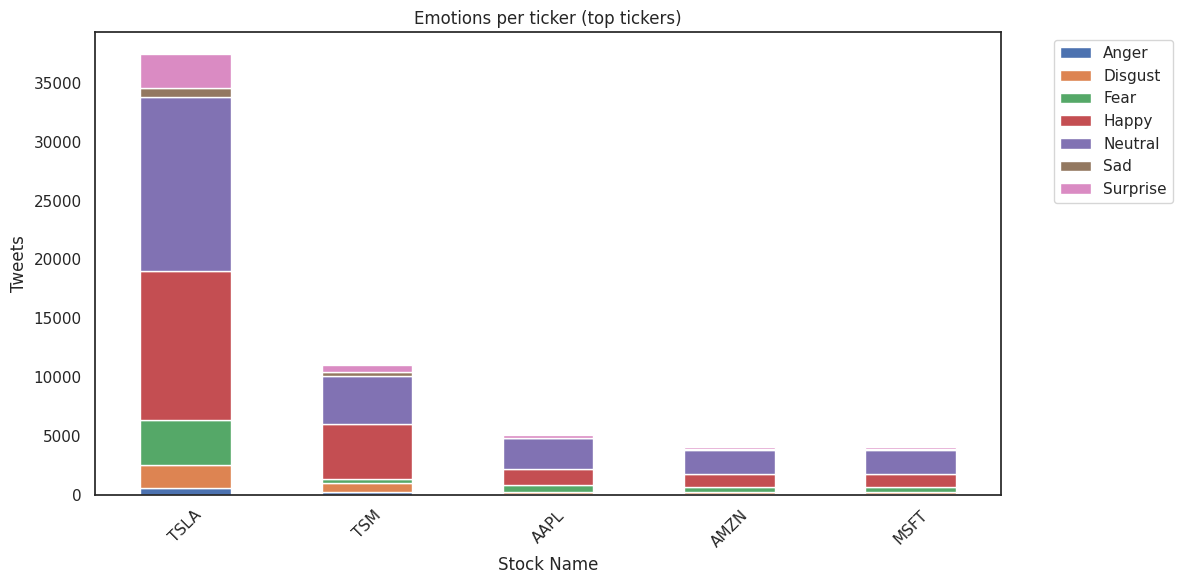

In [ ]:
top_n = 5
top_tickers = df0_final['Stock Name'].value_counts().head(top_n).index

emo_ticker = pd.crosstab(df0_final['Stock Name'], df0_final['emotion'])
emo_ticker = emo_ticker.loc[top_tickers]

emo_ticker_pct = emo_ticker.div(emo_ticker.sum(axis=1), axis=0)

plt.figure(figsize=(12,6))
emo_ticker.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title("Emotions per ticker (top tickers)")
plt.ylabel("Tweets")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
df0_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          80793 non-null  datetime64[ns]
 1   Tweet         80793 non-null  object        
 2   Stock Name    80793 non-null  string        
 3   Company Name  80793 non-null  object        
 4   tweet_len     80793 non-null  int64         
 5   emotion       80793 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3), string(1)
memory usage: 3.7+ MB


In [ ]:
# Merge the datasets on date parameter
merged_df = pd.merge(
    df0_final,
    df,
    on=['Date','Stock Name'],
    how='inner'
)

merged_df.drop(columns=['has_space','tweet_len'], inplace=True)
# Display top 5 in the merged dataset
merged_df.head()

,Date,Tweet,Stock Name,Company Name,emotion,Open,High,Low,Close,Adj Close,Volume
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla,Inc.",Happy,282.76001,283.649994,265.779999,268.209991,268.209991,77620600
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla,Inc.",Neutral,282.76001,283.649994,265.779999,268.209991,268.209991,77620600
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla,Inc.",Neutral,282.76001,283.649994,265.779999,268.209991,268.209991,77620600
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla,Inc.",Disgust,282.76001,283.649994,265.779999,268.209991,268.209991,77620600
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla,Inc.",Disgust,282.76001,283.649994,265.779999,268.209991,268.209991,77620600


In [ ]:
# Display the columns in merged dataset
merged_df.columns

Index(['Date', 'Tweet', 'Stock Name', 'Company Name', 'emotion', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume'],
      dtype='object')

In [ ]:
# Validate the rows in the dataset
merged_df.shape

(63676, 11)

In [ ]:
# Validate whether there is null values in the merged dataset
print(merged_df.isnull().sum())

Date            0
Tweet           0
Stock Name      0
Company Name    0
emotion         0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
dtype: int64


In [ ]:
merged_df.to_parquet('merged_stock_tweets_yfinance.parquet', index=False)

In [ ]:
%pip install yfinance
import yfinance as yf
import pandas as pd

tickers = ["TSLA", "TSM", "AAPL", "AMZN", "MSFT", "PG", "NIO", "META", "AMD",
           "NFLX", "GOOG", "PYPL", "DIS", "BA", "COST", "INTC", "KO", "CRM",
           "XPEV", "ENPH", "ZS", "VZ", "BX", "F", "NOC"]

all_ticker_data = []
for ticker in tickers:
    print(f"Downloading data for {ticker}...")
    data = yf.download(ticker, start="2022-10-01", end="2025-10-31",
                       auto_adjust=False, progress=False)

    if not data.empty:
        if isinstance(data.columns, pd.MultiIndex):
            data.columns = data.columns.get_level_values(0)

        data = data.reset_index()
        data['Stock Name'] = ticker

        print(f"  Columns: {data.columns.tolist()}")
        all_ticker_data.append(data)
    else:
        print(f"  No data found for {ticker}")

df_flat = pd.concat(all_ticker_data, ignore_index=True)

df_flat = df_flat[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Stock Name']]

#  Export to CSV
df_flat.to_csv("ohlcv_data.csv", index=False)
print("\n SUCCESS: File saved as ohlcv_data.csv")
print(f"Shape: {df_flat.shape}")
print("\nFirst few rows:")
print(df_flat.head())

/tmp/ipython-input-3015770136.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ohlcv_data = yf.download(tickers, start="2025-01-01", end="2025-10-31", group_by='ticker')
[*********************100%***********************]  25 of 25 completed


In [ ]:
%pip install gnews
from gnews import GNews
import pandas as pd
from datetime import datetime, timedelta
import time
import re

# --- Configuration ---
CSV_FILE = "cleaned_stock_news_2022_2026.csv"

# Date range
START_DATE = datetime(2022, 10, 1)
END_DATE = datetime(2025, 12, 31)

tickers = ["TSLA", "TSM", "AAPL", "AMZN", "MSFT", "NVDA", "PLTR", "META", "AMD",
           "NFLX", "GOOG", "PYPL", "DIS", "BA", "COST", "INTC", "KO", "CRM",
           "XPEV", "ENPH", "ZS", "VZ", "BX", "F", "NOC"]

# Map tickers to full company names
TICKER_NAMES = {
    "TSLA": "Tesla Inc", "TSM": "Taiwan Semiconductor Manufacturing Company",
    "AAPL": "Apple Inc", "AMZN": "Amazon.com Inc", "MSFT": "Microsoft Corporation",
    "NVDA": "NVIDIA Corporation", "PLTR": "Palantir Technologies Inc",
    "META": "Meta Platforms Inc", "AMD": "Advanced Micro Devices Inc",
    "NFLX": "Netflix Inc", "GOOG": "Alphabet Inc", "PYPL": "PayPal Holdings Inc",
    "DIS": "The Walt Disney Company", "BA": "The Boeing Company",
    "COST": "Costco Wholesale Corporation", "INTC": "Intel Corporation",
    "KO": "The Coca-Cola Company", "CRM": "Salesforce Inc",
    "XPEV": "XPeng Inc", "ENPH": "Enphase Energy Inc", "ZS": "Zscaler Inc",
    "VZ": "Verizon Communications Inc", "BX": "Blackstone Inc",
    "F": "Ford Motor Company", "NOC": "Northrop Grumman Corporation"
}

# Junk keywords to filter out automated/low-quality content
JUNK_KEYWORDS = [
    "overbought", "oversold", "form 4", "insider buy", "insider sell",
    "filing", "sec filing", "nasdaq:", "nyse:", "earnings call transcript",
    "stock alert", "stock pick", "buy now", "top stocks", "click here",
    "subscribe", "sign up", "newsletter", "advertisement", "sponsored",
    "price target", "technical analysis", "moved up", "moved down",
    "unusual options", "options activity", "short interest", "stock screener",
    "benzinga", "marketbeat", "tipranks", "stock rover"
]

# Minimum word count for meaningful content
MIN_WORD_COUNT = 15

# --- Helper Functions ---

def scrub_text(text):
    """Clean the text of URLs, HTML tags, and messy whitespace."""
    if not text:
        return ""
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"&\w+;", "", text)
    text = re.sub(r"<[^>]+>", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

def is_quality_content(text):
    """Filter out junk content and short tweets."""
    if not text:
        return False

    # Check minimum word count
    word_count = len(text.split())
    if word_count < MIN_WORD_COUNT:
        return False

    # Check for junk keywords
    text_lower = text.lower()
    if any(keyword in text_lower for keyword in JUNK_KEYWORDS):
        return False

    return True

def split_date_range(start_date, end_date, months_per_chunk=3):
    """Split date range into smaller chunks to bypass 100-article limit."""
    chunks = []
    current = start_date

    while current < end_date:
        chunk_end = min(current + timedelta(days=months_per_chunk * 30), end_date)
        chunks.append((current, chunk_end))
        current = chunk_end + timedelta(days=1)

    return chunks

def fetch_news_gnews(ticker, company_name, start_date, end_date):
    """Fetch news using GNews with chunked date ranges to get more articles."""
    all_news = []

    # Split into 3-month chunks to get more than 100 articles
    date_chunks = split_date_range(start_date, end_date, months_per_chunk=3)

    for chunk_start, chunk_end in date_chunks:
        try:
            google_news = GNews(
                language='en',
                country='US',
                start_date=(chunk_start.year, chunk_start.month, chunk_start.day),
                end_date=(chunk_end.year, chunk_end.month, chunk_end.day),
                max_results=100  # Max per chunk
            )

            # Search using both ticker and company name
            search_query = f"{ticker} OR {company_name} stock"
            news = google_news.get_news(search_query)

            if news:
                all_news.extend(news)
                print(f"    -> Found {len(news)} articles for {chunk_start.date()} to {chunk_end.date()}")

            time.sleep(0.5)  # Small delay between chunks

        except Exception as e:
            print(f"    -> Error for chunk {chunk_start.date()}: {e}")
            continue

    return all_news

# --- Main Logic ---

def main():
    final_data = []

    print("Starting Google News scraper with chunked date ranges...")
    print(f"Date range: {START_DATE.date()} to {END_DATE.date()}")
    print("Splitting into 3-month chunks to get MORE than 100 articles per ticker")
    print(f"Filters: Minimum {MIN_WORD_COUNT} words, removing junk keywords\n")
    print("Note: Make sure 'gnews' is installed: pip install gnews\n")

    for ticker in tickers:
        company_name = TICKER_NAMES.get(ticker, ticker)
        print(f"\nProcessing {ticker} ({company_name})...")

        news_items = fetch_news_gnews(ticker, company_name, START_DATE, END_DATE)
        count = 0

        for item in news_items:
            # Get published date
            pub_date = item.get("published date", "")

            # Get title and description
            title = item.get("title", "")
            description = item.get("description", "")

            # Combine title and description
            text = f"{title}. {description}" if description else title

            cleaned_text = scrub_text(text)

            # Apply quality filters
            if is_quality_content(cleaned_text):
                final_data.append({
                    "date": pub_date,
                    "tweet": cleaned_text,
                    "stock name": ticker,
                    "company name": company_name
                })
                count += 1

        print(f"  -> Total saved: {count} records")

    # Export to CSV
    if final_data:
        df = pd.DataFrame(final_data)
        df = df[["date", "tweet", "stock name", "company name"]]

        # Remove duplicates based on tweet content
        df = df.drop_duplicates(subset=["tweet"])

        # Sort by date
        df = df.sort_values("date")

        df.to_csv(CSV_FILE, index=False)
        print(f"\nSUCCESS: {len(df)} unique records saved to {CSV_FILE}")
        print(f"\nBreakdown by ticker:")
        ticker_counts = df["stock name"].value_counts().sort_index()
        for ticker, count in ticker_counts.items():
            print(f"  {ticker}: {count} articles")
        print(f"\nTotal unique articles: {len(df)}")
    else:
        print("\n No data found. Make sure 'gnews' is installed: pip install gnews")

if __name__ == "__main__":
    main()

Fetching TSLA...
Saved 248 clean records for TSLA.
Fetching TSM...
Saved 247 clean records for TSM.
Fetching AAPL...
Saved 246 clean records for AAPL.
Fetching AMZN...
Saved 247 clean records for AMZN.
Fetching MSFT...
Saved 247 clean records for MSFT.
Fetching NVDA...
Saved 248 clean records for NVDA.
Fetching PLTR...
Saved 246 clean records for PLTR.
Fetching META...
Saved 247 clean records for META.
Fetching AMD...
Saved 242 clean records for AMD.
Fetching NFLX...
Saved 248 clean records for NFLX.
Fetching GOOG...
Saved 249 clean records for GOOG.
Fetching PYPL...
Saved 241 clean records for PYPL.
Fetching DIS...
Saved 240 clean records for DIS.
Fetching BA...
Saved 228 clean records for BA.
Fetching COST...
Saved 234 clean records for COST.
Fetching INTC...
Saved 241 clean records for INTC.
Fetching KO...
Saved 241 clean records for KO.
Fetching CRM...
Saved 242 clean records for CRM.
Fetching XPEV...
Saved 239 clean records for XPEV.
Fetching ENPH...
Saved 234 clean records for EN

In [ ]:
df_test_financial_news_with_emotions = pd.read_csv("/content/cleaned_stock_news_2022_2026.csv")
# Loading the emtract model for consumption in data pipeline
print("=" * 70)
print("EMOTION CLASSIFICATION - SIMPLIFIED PIPELINE")
print("=" * 70)

device = 0 if torch.cuda.is_available() else -1

if device == 0:
    gpu_name = torch.cuda.get_device_name(0)
    print(f" GPU DETECTED: {gpu_name}")
    torch.cuda.empty_cache()
else:
    print(" Using CPU")

emotion_classifier = pipeline('text-classification',
                             model='vamossyd/emtract-distilbert-base-uncased-emotion',
                             device=device,
                             model_kwargs={'torch_dtype': torch.float16} if device == 0 else {})

def batch_classify_emotions(tweets, classifier, batch_size=128):
    emotions = []
    tweets_list = tweets.tolist()

    # Filter valid tweets
    valid_tweets = []
    valid_indices = []
    for idx, tweet in enumerate(tweets_list):
        if pd.notna(tweet) and isinstance(tweet, str):
            valid_tweets.append(tweet)
            valid_indices.append(idx)

    # Initialize results array with default values
    results = ['UNKNOWN'] * len(tweets_list)

    # Process in batches
    print(f"\nProcessing {len(valid_tweets)} tweets in batches of {batch_size}...")
    for i in tqdm(range(0, len(valid_tweets), batch_size), desc="Classifying emotions"):
        batch = valid_tweets[i:i+batch_size]
        try:
            with torch.no_grad():
                batch_results = classifier(batch, top_k=None)

            for result_idx, result in enumerate(batch_results):
                # Extract top emotion label
                if isinstance(result, list) and len(result) > 0:
                    top_emotion = result[0]['label']
                elif isinstance(result, dict) and 'label' in result:
                    top_emotion = result['label']
                else:
                    top_emotion = 'ERROR'

                results[valid_indices[i + result_idx]] = top_emotion
        except Exception as e:
            print(f"⚠ Error in batch {i}: {str(e)}")
            for result_idx in range(len(batch)):
                results[valid_indices[i + result_idx]] = 'ERROR'

        # GPU memory cleanup
        if device == 0 and (i // batch_size) % 10 == 0:
            torch.cuda.empty_cache()

    return results

# Apply emotion classification to dataset tweets
print(f"\nDataset shape: {df_test_financial_news_with_emotions.shape}")
print(f"Tweet column: 'tweet'")

start_time = time.time()
df_test_financial_news_with_emotions['emotion'] = batch_classify_emotions(df_test_financial_news_with_emotions['tweet'], emotion_classifier, batch_size=128)
classification_time = time.time() - start_time

# Calculate statistics
emotion_counts = df_test_financial_news_with_emotions['emotion'].value_counts()
print("\n" + "=" * 70)
print("CLASSIFICATION SUMMARY")
print("=" * 70)
print(f"\n Classification completed in {classification_time:.2f} seconds")
print(f"  Processing speed: {len(df_test_financial_news_with_emotions)/classification_time:.2f} tweets/second")
print(f"\nEmotion Distribution:")
print(emotion_counts)

# Save the new dataset with emotions
df_test_financial_news_with_emotions.to_parquet('stock_tweets_with_emotions_test_data.parquet', index=False)
print(f"\n Dataset saved: stock_tweets_with_emotions_test_data.parquet")
print(f"  Rows: {len(df_test_financial_news_with_emotions)}, Columns: {len(df_test_financial_news_with_emotions.columns)}")
print("=" * 70)

# Final GPU cleanup
if device == 0:
    torch.cuda.empty_cache()
gc.collect()


In [ ]:
df_test_financial_news_with_emotions_cleaned = pd.read_parquet("/content/stock_tweets_with_emotions_test_data.parquet")
print(df_test_financial_news_with_emotions_cleaned.shape)

# Use a lambda to format only valid dates and leave others untouched
def safe_format(x):
    try:
        # Convert to datetime and then to your specific string format
        return pd.to_datetime(x).strftime('%d/%m/%Y')
    except:
        return x

df_test_financial_news_with_emotions_cleaned['date'] = df_test_financial_news_with_emotions_cleaned['date'].apply(safe_format)
df_test_financial_news_with_emotions_cleaned.columns = df_test_financial_news_with_emotions_cleaned.columns.str.title()
df_test_financial_news_with_emotions_cleaned.head()

In [ ]:
df_ohclv_test = pd.read_csv("/content/ohlcv_data.csv")
df_ohclv_test['Date'] = pd.to_datetime(df_ohclv_test['Date']).dt.strftime('%d/%m/%Y')
df_ohclv_test.head()

In [ ]:
# Merge the datasets on date parameter

merged_test_df = pd.merge(
    df_test_financial_news_with_emotions_cleaned,
    df_ohclv_test,
    on=['Date','Stock Name'],
    how='inner'
)

# Display top 5 in the merged dataset
merged_test_df.head()

In [ ]:
merged_test_df.shape

In [ ]:
merged_test_df.columns

In [ ]:
merged_test_df.isnull().sum()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_parquet("/content/merged_stock_tweets_yfinance.parquet")

# Target
y = df["emotion"]

# Features
X = df.drop(columns=["emotion"])

# Time-aware split (NO stratify, NO shuffle)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=False
)

print("Train distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))


Train distribution:
emotion
Neutral     0.428838
Happy       0.310856
Fear        0.110483
Surprise    0.064605
Disgust     0.051885
Sad         0.020239
Anger       0.013094
Name: proportion, dtype: float64

Test distribution:
emotion
Neutral     0.433967
Happy       0.388505
Disgust     0.049623
Fear        0.043734
Surprise    0.041771
Sad         0.026303
Anger       0.016096
Name: proportion, dtype: float64


In [ ]:
# Recombine training data
df_train = X_train.copy()
df_train["emotion"] = y_train

In [ ]:
# Class imbalance BEFORE
before_counts = df_train["Stock Name"].value_counts()
min_count = before_counts.min()

# Downsampling
df_train_balanced = (
    df_train
    .groupby("Stock Name", group_keys=False)
    .apply(lambda x: x.sample(min_count, random_state=42))
)

# Class imbalance AFTER
after_counts = df_train_balanced["Stock Name"].value_counts()

print("\nBefore balancing:")
print(before_counts)

print("\nAfter balancing:")
print(after_counts)



Before balancing:
Stock Name
TSLA    30028
AAPL     4131
MSFT     3340
PG       3340
AMZN     3340
META     2317
AMD      1796
NFLX     1464
GOOG     1053
TSM       131
Name: count, dtype: Int64

After balancing:
Stock Name
AAPL    131
AMD     131
AMZN    131
GOOG    131
META    131
MSFT    131
NFLX    131
PG      131
TSLA    131
TSM     131
Name: count, dtype: Int64


/tmp/ipython-input-74289342.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


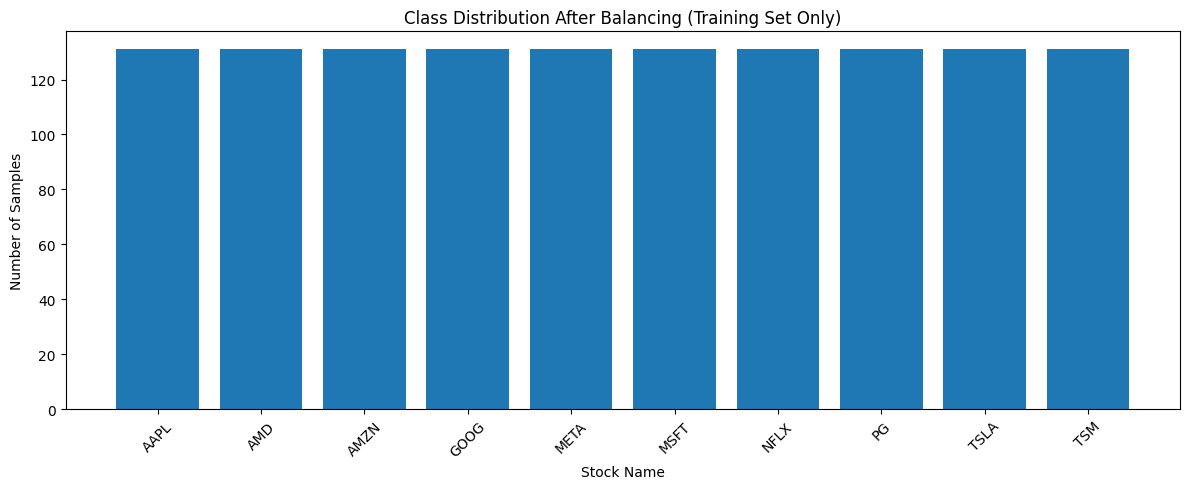

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(after_counts.index, after_counts.values)
plt.title("Class Distribution After Balancing (Training Set Only)")
plt.xlabel("Stock Name")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Final training data (balanced)
X_train_bal = df_train_balanced.drop(columns=["emotion"])
y_train_bal = df_train_balanced["emotion"]

# Validation/Test remain untouched
X_test_final = X_test
y_test_final = y_test